-- Output: Number of predicted wins (W)

To understand the columns meaning, follow the link given below to understand the baseball statistics: https://en.wikipedia.org/wiki/Baseball_statistics
For downloading the dataset, use the link given below.

Dataset Link-
    • https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/baseball.csv

In [ ]:
# IMPORT LIBRARIES

import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from scipy import stats as sp

In [ ]:
# read csv and store in DF

df_baseb = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')


df_baseb.head(4)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101


# Non Graphical Analysis

In [ ]:
# Check the columns

df_baseb.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [ ]:
# Check the data size & shape

df_baseb.shape

(30, 17)

30 rows & 17 columns , 1 target W & remaining 16 independent labels

In [ ]:
# Check database Info

df_baseb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


No null values, except ERA all are int datatypes

<Axes: >

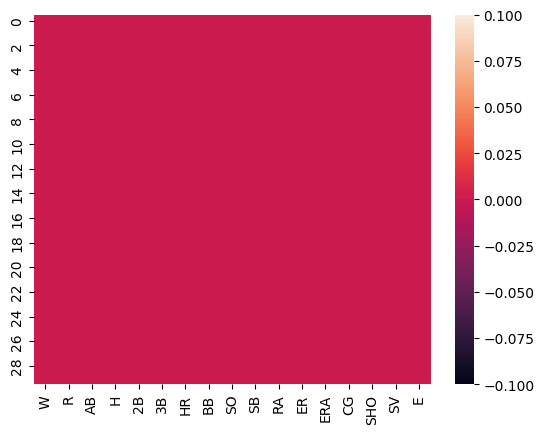

In [ ]:
# Visualizing null values using heat map

sns.heatmap(df_baseb.isnull())

In [ ]:
# Statistical Summary

df_baseb.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Statistical summary indicates high std deviations, scaling may be needed

In [ ]:
# Finding the number of unique values in a column

for index in df_baseb.columns.to_list():

  print(index,':', df_baseb[index].nunique())

W : 24
R : 28
AB : 29
H : 29
2B : 22
3B : 23
HR : 27
BB : 29
SO : 29
SB : 27
RA : 30
ER : 30
ERA : 30
CG : 9
SHO : 12
SV : 20
E : 21


All columns seems to be numeric continous, wil be confirmed in Graphical Analysis - using countplot

In [ ]:
# Applying Min-Max Scalar

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Split the independednt label for Scaling

df_bb_ft = df_baseb.iloc[:,1:]
df_bb_scaled = pd.DataFrame(scaler.fit_transform(df_bb_ft),columns = df_bb_ft.columns.to_list())

df_bb_scaled.head(3)

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.474843,0.719697,0.905759,0.888889,0.805556,0.295455,0.041026,0.000000,0.666667,0.363636,0.383178,0.376190,0.181818,0.235294,0.823529,0.254902
1,0.386792,0.310606,0.130890,0.569444,0.861111,0.424242,0.328205,0.533945,0.288889,0.548589,0.545171,0.538095,0.181818,0.470588,0.500000,0.215686
2,0.301887,0.204545,0.371728,0.930556,0.444444,0.310606,0.810256,0.337615,0.466667,0.360502,0.330218,0.347619,1.000000,0.352941,0.294118,0.078431


In [ ]:
# check std deviation

df_bb_scaled.describe()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.362369,0.497222,0.416405,0.537963,0.508333,0.482071,0.482564,0.504954,0.438889,0.511703,0.491693,0.483968,0.315152,0.429412,0.443137,0.379085
std,0.184785,0.266922,0.299167,0.251325,0.290343,0.241086,0.292583,0.190384,0.253502,0.226044,0.218507,0.216233,0.251225,0.242363,0.231451,0.273704
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.246069,0.299242,0.204188,0.364583,0.277778,0.304924,0.273077,0.338532,0.277778,0.348746,0.340343,0.353571,0.090909,0.294118,0.272059,0.215686
50%,0.364780,0.473485,0.306283,0.548611,0.500000,0.443182,0.502564,0.529358,0.438889,0.534483,0.518692,0.516667,0.272727,0.470588,0.411765,0.313725
75%,0.456761,0.700758,0.667539,0.732639,0.722222,0.583333,0.647436,0.621101,0.583333,0.650470,0.626947,0.609524,0.522727,0.529412,0.551471,0.426471
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Std deviation has reduced and are now within acceptable limits, after applying Min max scalar

In [ ]:
# add target label

df_bb_scaled['W'] = df_baseb['W']

# Graphical Analysis

Univariate

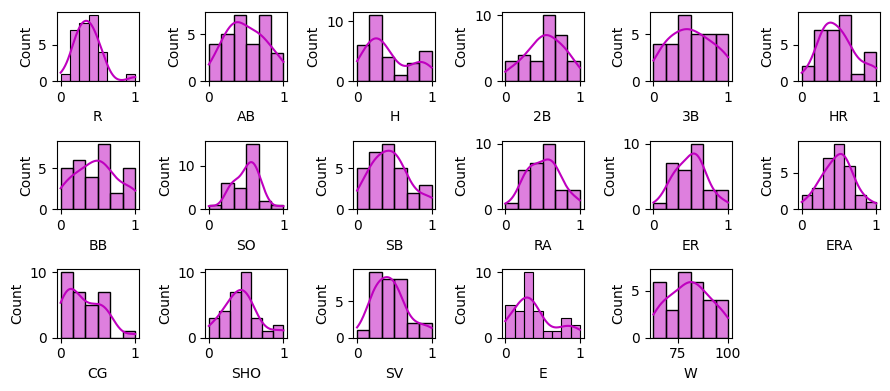

In [ ]:
# Distribution of values in columns

mp.figure(figsize=(9,4))
pnum = 1

for index in df_bb_scaled.columns.to_list():
  if(pnum<=18):
    ax = mp.subplot(3,6, pnum)
    sns.histplot(df_bb_scaled[index], kde = True, color = 'm')
    mp.xlabel(index)
  pnum = pnum+1

mp.tight_layout()
mp.show()

In [ ]:
# checking skewness

df_bb_scaled.skew()

R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
W      0.047089
dtype: float64

**Skewness in all columns are within permissible limits**

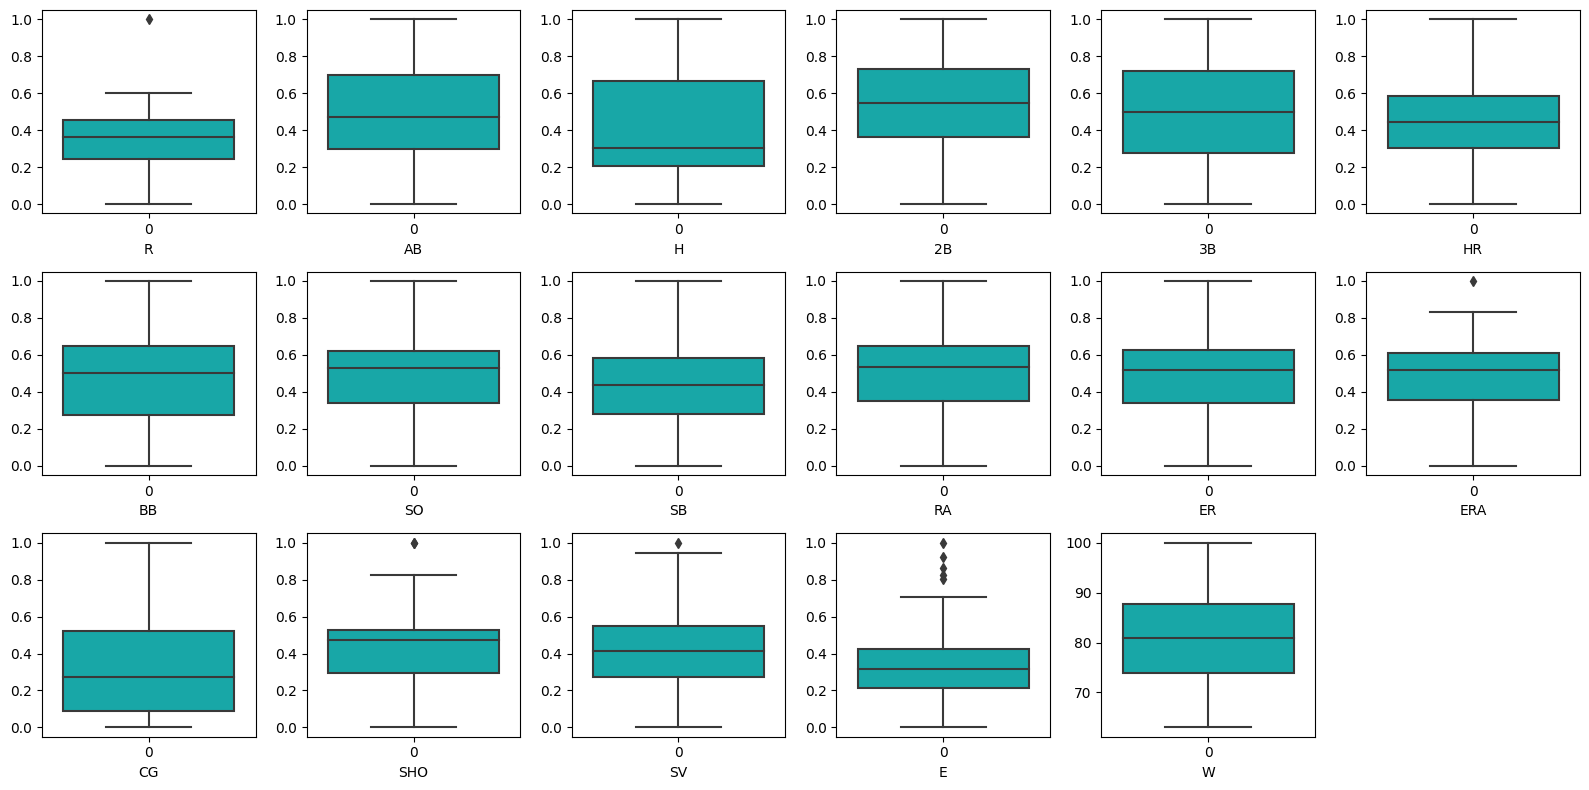

In [ ]:
# Box Plot of columns to check for outliers

# Box plot to visualize outliers

mp.figure(figsize=(16,8))
pnum = 1

for index in df_bb_scaled.columns.to_list():
  if(pnum<=18):
    ax = mp.subplot(3,6, pnum)
    sns.boxplot(df_bb_scaled[index], color = 'c')
    mp.xlabel(index)
  pnum = pnum+1

mp.tight_layout()
mp.show()

**Very few outliers are there, so not removal of outliers are not required, also the dataset has only 30 rows**

BIVARIATE ANALYSIS

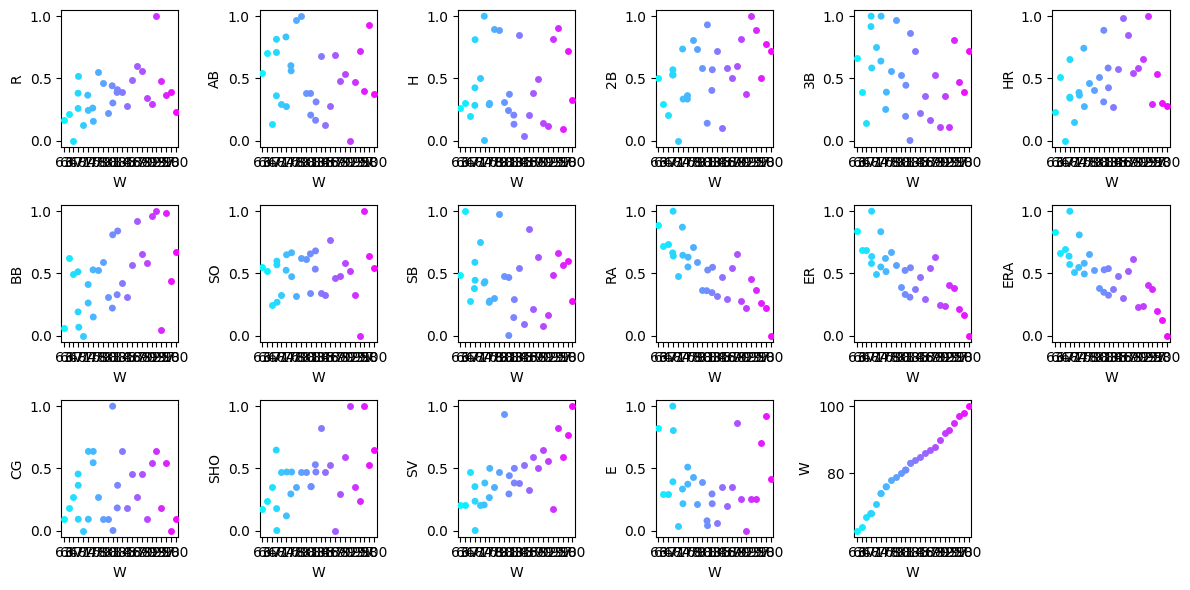

In [ ]:
# Striplot to understand relation between independent labels with target labels

mp.figure(figsize=(12,6))
pnum = 1

for index in df_bb_scaled.columns.to_list():
  if(pnum<=18):
    ax = mp.subplot(3,6, pnum)
    sns.stripplot(x=df_bb_scaled['W'], y =df_bb_scaled[index], palette = 'cool')
    mp.ylabel(index)
  pnum = pnum+1

mp.tight_layout()
mp.show()


*   HR, BB shows +ve correlation with wins

*   RA, ER, ERA shows -ve correlation with wins

Will be confirmed in Multivariate Analysis

# MULTI VARIATE ANALYSIS

<Axes: >

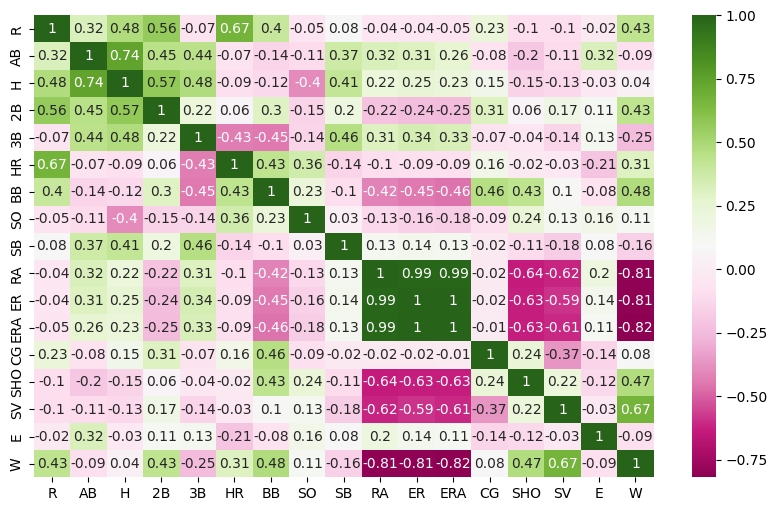

In [ ]:
# Checking Heat map of correlation

mp.figure(figsize=(10,6))
sns.heatmap(round(df_bb_scaled.corr(),2), cmap = 'PiYG', annot = True)



*   ERA & RA shows very high +ve correlation with eah other
*   ERA, RA, ER shows strong -ve correlation with W
*   ERA, RA, ER shows -ve correlation with SHO & SV
*   SV shows +ve correlation with W





In [ ]:
# Check VIF for all columns & Select features accordingly

from statsmodels.stats.outliers_influence import variance_inflation_factor

df_bb_vif = df_bb_scaled.iloc[:,:-1]
vif = pd.DataFrame()
vif['Feature'] = df_bb_vif.columns.to_list()
vif['VIF Val'] = [variance_inflation_factor(df_bb_vif.values,i) for i in range(len(df_bb_vif.columns))]

vif

,Feature,VIF Val
0,R,57.331295
1,AB,43.344179
2,H,27.573377
3,2B,23.010036
4,3B,13.493803
5,HR,49.987440
6,BB,14.299124
7,SO,21.879033
8,SB,6.577128
9,RA,961.243957


ER is showing very high VIF, dropping *ER* Column

In [ ]:
# Remove Collinearity by dropping High VIF label , ie, ER

df_bb_vif.drop('ER', axis=1, inplace = True)
vif = pd.DataFrame()
vif['Feature'] = df_bb_vif.columns.to_list()
vif['VIF Val'] = [variance_inflation_factor(df_bb_vif.values,i) for i in range(len(df_bb_vif.columns))]

vif

,Feature,VIF Val
0,R,53.235776
1,AB,26.852270
2,H,27.572429
3,2B,21.148407
4,3B,13.347666
5,HR,46.404905
6,BB,14.285136
7,SO,21.540834
8,SB,6.575137
9,RA,766.506491


RA is showing very high VIF, dropping RA Column

In [ ]:
# Remove Collinearity by dropping High VIF label , ie, RA

df_bb_vif.drop('RA', axis=1, inplace = True)
vif = pd.DataFrame()
vif['Feature'] = df_bb_vif.columns.to_list()
vif['VIF Val'] = [variance_inflation_factor(df_bb_vif.values,i) for i in range(len(df_bb_vif.columns))]

vif

,Feature,VIF Val
0,R,52.194381
1,AB,20.025611
2,H,25.282958
3,2B,20.761806
4,3B,12.653647
5,HR,40.241983
6,BB,13.105859
7,SO,17.735461
8,SB,6.494132
9,ERA,10.580928


In [ ]:
# Remove Collinearity by dropping High VIF label , ie, R

df_bb_vif.drop('R', axis=1, inplace = True)
vif = pd.DataFrame()
vif['Feature'] = df_bb_vif.columns.to_list()
vif['VIF Val'] = [variance_inflation_factor(df_bb_vif.values,i) for i in range(len(df_bb_vif.columns))]

vif

,Feature,VIF Val
0,AB,16.435866
1,H,14.869217
2,2B,16.537909
3,3B,11.687218
4,HR,9.264558
5,BB,10.556549
6,SO,16.248918
7,SB,6.224162
8,ERA,10.077644
9,CG,5.900236


In [ ]:
# Remove Collinearity by dropping High VIF label , ie, 2B

df_bb_vif.drop('2B', axis=1, inplace = True)
vif = pd.DataFrame()
vif['Feature'] = df_bb_vif.columns.to_list()
vif['VIF Val'] = [variance_inflation_factor(df_bb_vif.values,i) for i in range(len(df_bb_vif.columns))]

vif

,Feature,VIF Val
0,AB,16.291877
1,H,13.090860
2,3B,10.420717
3,HR,9.087074
4,BB,9.542840
5,SO,16.248901
6,SB,6.198339
7,ERA,8.502839
8,CG,5.117241
9,SHO,7.773804


In [ ]:
# Remove Collinearity by dropping High VIF label , ie, AB

df_bb_vif.drop('AB', axis=1, inplace = True)
vif = pd.DataFrame()
vif['Feature'] = df_bb_vif.columns.to_list()
vif['VIF Val'] = [variance_inflation_factor(df_bb_vif.values,i) for i in range(len(df_bb_vif.columns))]

vif

,Feature,VIF Val
0,H,5.935655
1,3B,10.350620
2,HR,9.070024
3,BB,9.432986
4,SO,15.480486
5,SB,6.182373
6,ERA,8.487752
7,CG,4.743447
8,SHO,7.749918
9,SV,5.505631


In [ ]:
# Remove Collinearity by dropping High VIF label , ie, SO

df_bb_vif.drop('SO', axis=1, inplace = True)
vif = pd.DataFrame()
vif['Feature'] = df_bb_vif.columns.to_list()
vif['VIF Val'] = [variance_inflation_factor(df_bb_vif.values,i) for i in range(len(df_bb_vif.columns))]

vif

,Feature,VIF Val
0,H,4.651872
1,3B,10.190691
2,HR,6.890266
3,BB,9.397042
4,SB,5.672845
5,ERA,7.958206
6,CG,4.694209
7,SHO,6.885345
8,SV,5.257009
9,E,3.197754


*VIF has been removed considerably, not dropping any further features*

# MODELLING

In [ ]:
# Separate independent, target labels for training dataset

x_df = df_bb_vif
y_df = df_bb_scaled['W']

# Import Libraraies
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

print(x_df.shape)
print(y_df.shape)

(30, 10)
(30,)


In [ ]:
# Importing required Libraries

from sklearn.linear_model import Lasso, Ridge, LinearRegression, ElasticNet
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

In [ ]:
# Hypertuning various models

ls = Lasso()
rd = Ridge()
en = ElasticNet()

mdl = [ls, rd, en]

param = {"alpha": [0.001, 0.01, 0.1,1,10], "random_state": range(1,100)}

samples = 8
bs_prm = []

for mod in mdl:
  randomCV = RandomizedSearchCV(mod, param_distributions=param, n_iter=samples,cv=5)
  randomCV.fit(x_df, y_df)
  print(mod, randomCV.best_params_)
  bs_prm.append(randomCV.best_params_)

Lasso() {'random_state': 23, 'alpha': 0.1}
Ridge() {'random_state': 15, 'alpha': 0.1}
ElasticNet() {'random_state': 56, 'alpha': 0.01}


In [ ]:
# Checking Metrics for the hypertuned parameters of the Model

from sklearn.metrics import  mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score

min_mse = 999999999999999999999999
bs_prm

[{'random_state': 23, 'alpha': 0.1},
 {'random_state': 15, 'alpha': 0.1},
 {'random_state': 56, 'alpha': 0.01}]

*Applying Lasso with Hypertuned Parameters*

In [ ]:
# Lasso

bsp = bs_prm[0]
LS = Lasso(random_state = bsp['random_state'], alpha = bsp['alpha'])

bst_rs = 0

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, random_state = i, test_size = 0.2)
  LS.fit(x_train, y_train)
  predict = LS.predict(x_test)
  msq_err = mean_squared_error(y_test, predict)
  r2_sc = r2_score(y_test, predict)

  if(msq_err <= min_mse):
    min_mse = msq_err
    bst_rs = i

print("Least MSE at random state = ", bst_rs, 'mse:',min_mse, "r2_scr:", r2_sc)

Least MSE at random state =  4 mse: 2.051702603737281 r2_scr: 0.8974512556617379


In [ ]:
# Applying Ridge with hypertuned parameters

bsp = bs_prm[1]
RG = Ridge(random_state = bsp['random_state'], alpha = bsp['alpha'])

bst_rs = 0

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, random_state = i, test_size = 0.2)
  RG.fit(x_train, y_train)
  predict = RG.predict(x_test)
  msq_err = mean_squared_error(y_test, predict)
  r2_sc = r2_score(y_test, predict)

  if(msq_err <= min_mse):
    min_mse = msq_err
    bst_rs = i

print("Least MSE at random state = ", bst_rs, 'mse:',min_mse, "r2_scr:", r2_sc)

Least MSE at random state =  0 mse: 2.051702603737281 r2_scr: 0.9001324850332112


In [ ]:
# Applying ElasticNet with hypertuned parameters

bsp = bs_prm[2]
EN = ElasticNet(random_state = bsp['random_state'], alpha = bsp['alpha'])

bst_rs = 0

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, random_state = i, test_size = 0.2)
  EN.fit(x_train, y_train)
  predict = EN.predict(x_test)
  msq_err = mean_squared_error(y_test, predict)
  r2_sc = r2_score(y_test, predict)

  if(msq_err <= min_mse):
    min_mse = msq_err
    bst_rs = i

print("Least MSE at random state = ", bst_rs, 'mse:',min_mse, "r2_scr:", r2_sc)

Least MSE at random state =  0 mse: 2.051702603737281 r2_scr: 0.8965349451801596


Checking RandomForestRegressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()

param = {"criterion": ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'], "random_state": range(1,100), 'max_features' :['sqrt','log2','None']}

randomCV = RandomizedSearchCV(rfr, param_distributions=param, n_iter=samples,cv=5)
randomCV.fit(x_df, y_df)
print(rfr, randomCV.best_params_)
bs_prm = (randomCV.best_params_)

RandomForestRegressor() {'random_state': 9, 'max_features': 'log2', 'criterion': 'absolute_error'}


In [ ]:
# Applying RFR with hypertuned parameters

RFR = RandomForestRegressor(random_state = bs_prm['random_state'], max_features = bs_prm['max_features'], criterion = bs_prm['criterion'])

bst_rs = 0

for i in range(0,100):
  x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, random_state = i, test_size = 0.2)
  RFR.fit(x_train, y_train)
  predict = RFR.predict(x_test)
  msq_err = mean_squared_error(y_test, predict)
  r2_sc = r2_score(y_test, predict)

  if(msq_err <= min_mse):
    min_mse = msq_err
    bst_rs = i

print("Least MSE at random state = ", bst_rs, 'mse:',min_mse, "r2_scr:", r2_sc)


Least MSE at random state =  0 mse: 2.051702603737281 r2_scr: 0.6071818330941154


MSE: Is almost same for all models, MSE& r2 score are best for Ridge.

Checking CV Score for all models



In [ ]:
from sklearn.model_selection import cross_val_score

cv = 5

model_list = [LS, RG, EN, RFR]
cv_score_list = []

for mdl in model_list:
  cvs = cross_val_score(mdl, x_df,y_df)
  print(mdl, ': Avg CV Score is ', cvs.mean() )
  cv_score_list.append(cvs.mean())

Lasso(alpha=0.1, random_state=23) : Avg CV Score is  0.25798104773204455
Ridge(alpha=0.1, random_state=15) : Avg CV Score is  0.2452161181172888
ElasticNet(alpha=0.01, random_state=56) : Avg CV Score is  0.2417336722376123
RandomForestRegressor(criterion='absolute_error', max_features='log2',
                      random_state=9) : Avg CV Score is  -0.32757411020985744


# **SAVING THE MODEL**

In [ ]:
# Import Joblib

import joblib

joblib.dump(RG, 'Baseball.pkl')

['Baseball.pkl']

*Check the Model*

In [ ]:

# Load the saved model

load_BB = joblib.load('Baseball.pkl')

BB = load_BB

In [ ]:
# Predictor Function

def pred_baseball(input):
  inp = np.array(input)
  pred_bb  =  BB.predict(inp.reshape(1, -1))

  return pred_bb


In [ ]:
# Sample Data for Verifying Prediction

rws = [11, 18, 3, 24, 27]

In [ ]:
for row in rws:
  print('Actual:', y_df.iloc[row] , 'Predicted by Model:', pred_baseball(x_df.iloc[row,:]))

Actual: 86 Predicted by Model: [85.82700723]
Actual: 68 Predicted by Model: [70.77979171]
Actual: 76 Predicted by Model: [73.84791708]
Actual: 63 Predicted by Model: [61.60140319]
Actual: 79 Predicted by Model: [83.26988523]
